### ***Initializing and Importing Packages***

In [1]:
using Plots, DataFrames, StatsBase, Plots.PlotMeasures, LaTeXStrings, CSV, MarketData, JLD

DataDir = "../../Data/"
FigsDir = "../../Figs/"

include("Mods.jl")

theme(:dark)
Plots.default(titlefontsize=12, tickfontsize=10, labelfontsize=12, legendfontsize=9,
    fontfamily="Computer Modern", frame=:box, label=nothing)

### ***Setting Data Parameters***

In [2]:
StartTime = DateTime(2021, 1, 1);
EndTime = DateTime(2022, 6, 1);

Symbols = String["ETH-USD", "BTC-USD", "USDT-USD",
    "BNB-USD", "XRP-USD", "ADA-USD",
    "SOL-USD", "DOGE-USD", "TRX-USD",
    "AVAX-USD", "WBTC-USD", "LEO-USD",
    "UNI-USD", "MATIC-USD", "LTC-USD"];

### ***Exporting/Saving and Loading Data***

In [3]:
# Data = StatsMods.GetData(Symbols, StartTime, EndTime);
# StatsMods.SaveData(Symbols, StartTime, EndTime, DataDir * "Stage-1-Data/");
Data = StatsMods.LoadData(Symbols, DataDir * "Stage-1-Data/")
ReturnMatrix = hcat([StatsMods.GetReturn(data) for data ∈ Data]...)
CorMat = cor(ReturnMatrix);
DisMat = StatsMods.CalculateDistance.(CorMat);

### ***Showing the Results***

### ***Correlation Matrix***

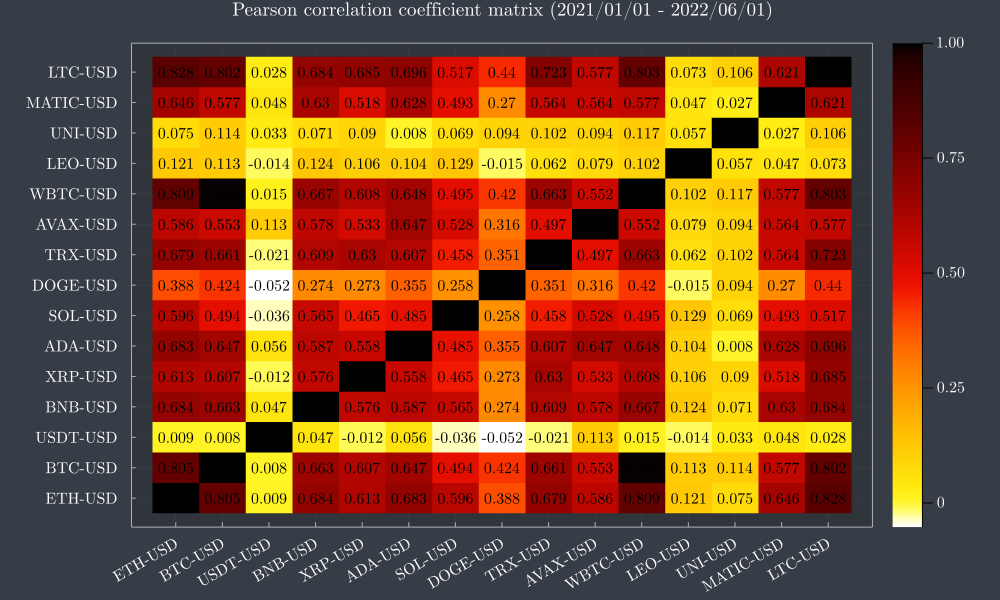

In [4]:
CorPlot = begin
    StatsMods.matrixmap(Symbols, Symbols, CorMat, annotationargs=(10, "Arial", :black), size=(1000, 600), c=cgrad(rev=true))
    plot!(title="Pearson correlation coefficient matrix (2021/01/01 - 2022/06/01)", rightmargin=5mm, bottommargin=5mm, topmargin=5mm, leftmargin=5mm)
end
savefig(CorPlot, FigsDir * "S1-CorMatPlot.pdf")
display(CorPlot)

### ***Distance Matrix***

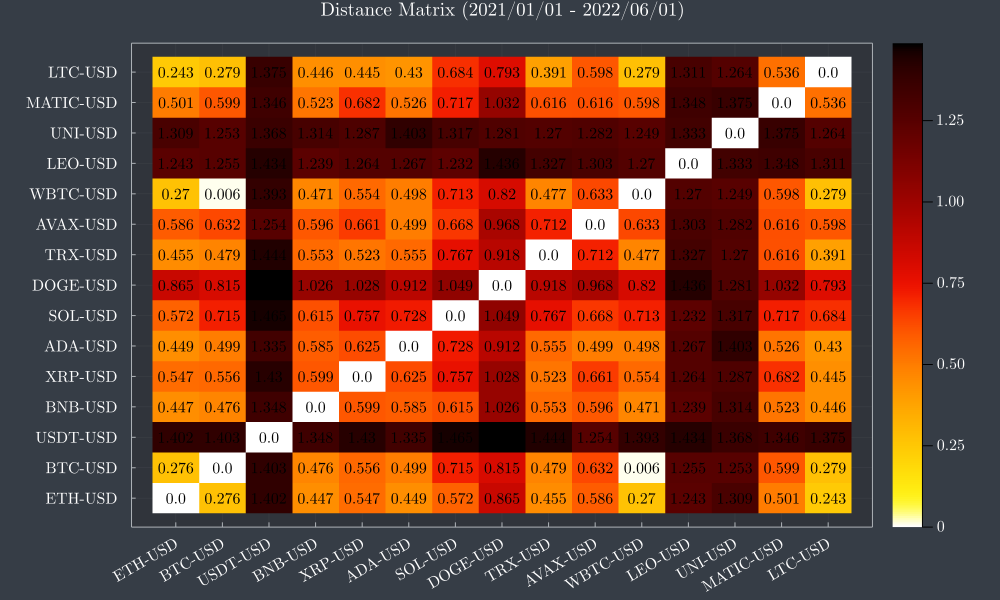

In [5]:
DisPlot = begin
    StatsMods.matrixmap(Symbols, Symbols, DisMat, annotationargs=(10, "Arial", :black), size=(1000, 600), c=cgrad(rev=true))
    plot!(title="Distance Matrix (2021/01/01 - 2022/06/01)", rightmargin=5mm, bottommargin=5mm, topmargin=5mm, leftmargin=5mm)
end
savefig(DisPlot, FigsDir * "S1-DisMatPlot.pdf")
display(DisPlot)